# **_Chess Piece Validation Model_**

### __*This CNN is supposed can determine what kind of Chess Piece is in the Image from the original Dataset*__

<br>

### __*Import Libraries and choose the device*__

In [65]:
# Import of the Libraries
import os
import CNN

# Torch libraries
from torch.utils.data import DataLoader

# Device config
GPU = CNN.pick_device()

Using the Graphics Card


<br>

### __*Training Preparation (Set all variables here)*__

In [66]:
# Image Dimensions
IMG_SIZE = 85           # 85*85 pixels
COLOUR_SIZE = 1

# Define the directory
FILE_PATH = './data/chess/pieces'           # Sub-Folders Location
CSV_PATH = './data/chess/data.csv'          # CSV Location
CATEGORIES = os.listdir(FILE_PATH)          # Turn Sub-Folder names into a list
N_CLASSES = len(CATEGORIES)                 # Number of different classes

# Normalized Transformation
MEAN, STD = CNN.dataset.get_normal(FILE_PATH, IMG_SIZE, IMG_SIZE)
trans_normal = CNN.dataset.trans_normal(IMG_SIZE, IMG_SIZE, MEAN, STD)

# Create the .csv file & dictionary
indexing = CNN.dataset.create_csv(FILE_PATH, CSV_PATH, rewrite=True, mul=4)

# Create the Datasets
dataset = CNN.dataset.CustomDataset(FILE_PATH, CSV_PATH, transform=trans_normal)

# Create the DataLoaders
loader = DataLoader(dataset, shuffle=True)

# Create the Model
model = CNN.model.ConvNet(IMG_SIZE, IMG_SIZE, N_CLASSES, COLOUR_SIZE).to(GPU)

#### __*Look at some data*__

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


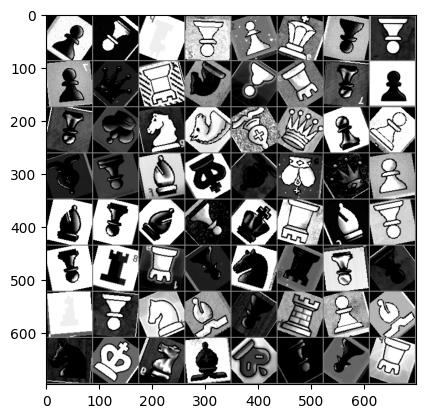

Batch size: 64 | Colour size: 1 | Image Size: 85*85 pixels


,Class,Train Data,Test Data,Total
0,king,136,0,136
1,pawn,956,0,956
2,rook,288,0,288
3,queen,136,0,136
4,bishop,268,0,268
5,knight,284,0,284
,,,,
T:,6,2068,0,2068


In [67]:
# Get some random training stats
CNN.visual.overview(dataset, None, indexing)

<br>

### __*Validation Loop*__

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Class: bishop | Predicted: pawn


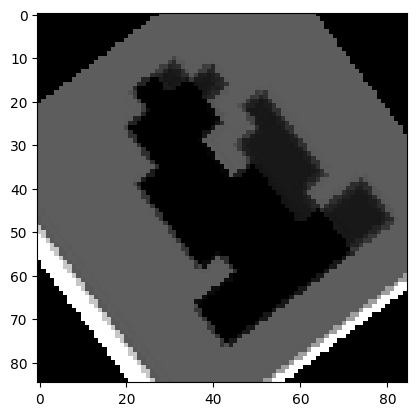


Class: bishop | Predicted: pawn


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


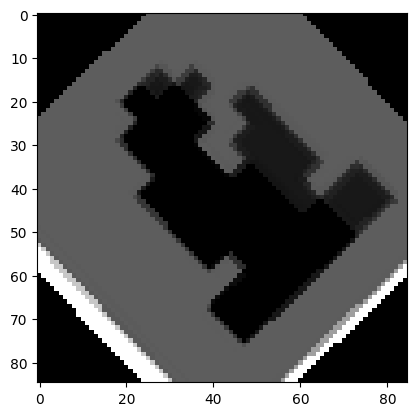

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Class: queen | Predicted: knight


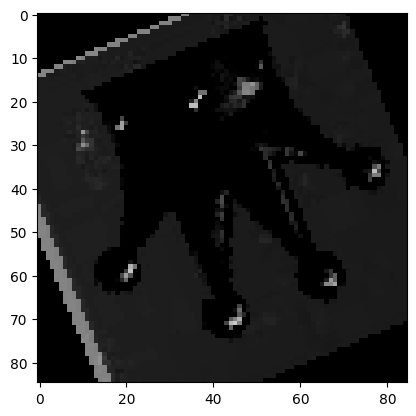

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Class: rook | Predicted: bishop


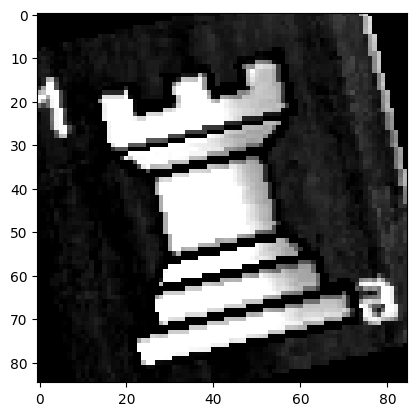

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Class: queen | Predicted: knight


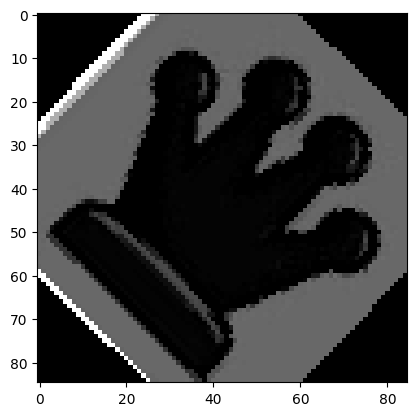

Accuracy of the Model: 97.63 %
Accuracy of king: 91.18 %
Accuracy of pawn: 99.16 %
Accuracy of rook: 98.61 %
Accuracy of queen: 97.06 %
Accuracy of bishop: 97.76 %
Accuracy of knight: 94.72 %


In [68]:
SAVE_PATH = './data/chess/chess.pth'

# Test the dataset
res = CNN.model.load_model(model, loader, CATEGORIES, save_path=SAVE_PATH, show_wrongs=True, n_wrongs=5)